In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, FloatSlider

# 1. Create data that has a clear curve (parabolic shape)
x_data_quad = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# y = 0.5x^2 - 4x + 10, with some random noise
y_data_quad = 0.5 * x_data_quad**2 - 4 * x_data_quad + 10 + np.random.normal(0, 2, size=len(x_data_quad))

# 2. Calculate the "best fit" curve using np.polyfit
best_a, best_b, best_c = np.polyfit(x_data_quad, y_data_quad, 2)

# 3. Create a function that will be called every time a slider is moved
def plot_quadratic_fit(a, b, c):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define a smooth line for plotting our functions
    x_smooth = np.linspace(-1, 10, 200)

    # Plot the original data points
    ax.scatter(x_data_quad, y_data_quad, color='red', label='Original Data Points')
    
    # Plot the "best fit" curve from polyfit
    y_best_fit = best_a * x_smooth**2 + best_b * x_smooth + best_c
    ax.plot(x_smooth, y_best_fit, color='green', linestyle='--', label=f'Best Fit: a={best_a:.2f}, b={best_b:.2f}, c={best_c:.2f}')
    
    # Plot the curve from our interactive sliders
    y_interactive = a * x_smooth**2 + b * x_smooth + c
    ax.plot(x_smooth, y_interactive, color='blue', linewidth=2.5, label=f'Your Fit: a={a:.2f}, b={b:.2f}, c={c:.2f}')
    
    # Formatting
    ax.set_title("Interactive Quadratic Fit (y = ax² + bx + c)", fontsize=16)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_xlim(-1, 10)
    ax.set_ylim(min(y_data_quad) - 5, max(y_data_quad) + 5)
    ax.legend()
    plt.show()

# 4. Create the interactive widget
# Sliders for coefficients a, b, and c
interactive_plot_quad = interactive(plot_quadratic_fit, 
                                    a=FloatSlider(min=-5.0, max=5.0, step=0.1, value=best_a, description='a (curve)'),
                                    b=FloatSlider(min=-20.0, max=10.0, step=0.1, value=best_b, description='b (slope)'),
                                    c=FloatSlider(min=-10.0, max=30.0, step=0.1, value=best_c, description='c (intercept)')
                                   )

# Display the widget
display(interactive_plot_quad)

interactive(children=(FloatSlider(value=0.5775961939505599, description='a (curve)', max=5.0, min=-5.0), Float…

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
lookback_ranks = np.array([10, 12, 11, 15, 14, 18, 17])
x_values = np.arange(len(lookback_ranks))

# Run polyfit, but this time SAVE the intercept
# Instead of `slope, _`, we use `slope, intercept`
slope, intercept = np.polyfit(x_values, lookback_ranks, 1)

print(f"Calculated Slope (m): {slope:.2f}")
print(f"Calculated Intercept (b): {intercept:.2f}")

Calculated Slope (m): 1.29
Calculated Intercept (b): 10.00


In [5]:
# Predicted value = slope * x + intercept
predicted_ranks = slope * x_values + intercept

print("\n--- Comparing Actual vs. Predicted ---")
print(f"X Values:         {x_values}")
print(f"Actual Ranks:     {lookback_ranks}")
print(f"Predicted Ranks:  {np.round(predicted_ranks, 2)}")


--- Comparing Actual vs. Predicted ---
X Values:         [0 1 2 3 4 5 6]
Actual Ranks:     [10 12 11 15 14 18 17]
Predicted Ranks:  [10.   11.29 12.57 13.86 15.14 16.43 17.71]


In [6]:
residuals = lookback_ranks - predicted_ranks

print("\n--- The Residuals (Errors) ---")
print(f"Residuals: {np.round(residuals, 2)}")


--- The Residuals (Errors) ---
Residuals: [-0.    0.71 -1.57  1.14 -1.14  1.57 -0.71]


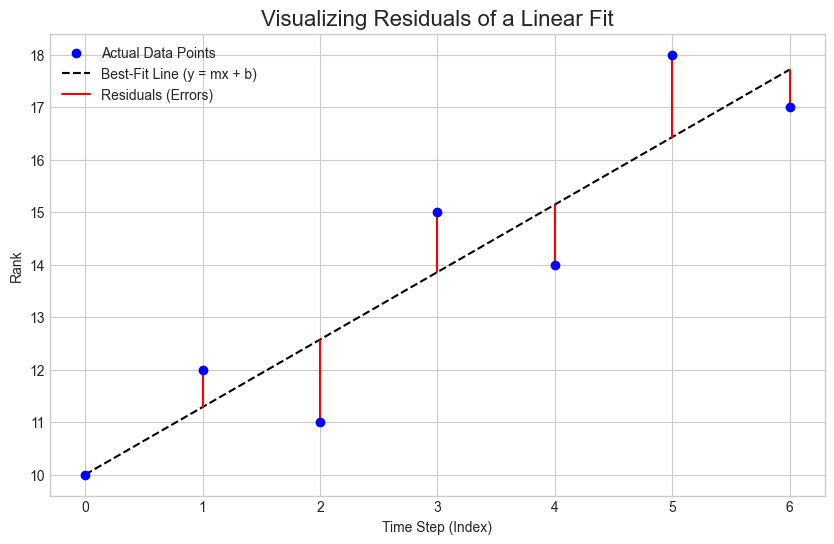

In [7]:
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# 1. Plot the original data points
ax.scatter(x_values, lookback_ranks, color='blue', label='Actual Data Points', zorder=5)

# 2. Plot the best-fit line from polyfit
ax.plot(x_values, predicted_ranks, color='black', linestyle='--', label='Best-Fit Line (y = mx + b)')

# 3. Plot the residuals as vertical lines
for i in range(len(x_values)):
    ax.plot([x_values[i], x_values[i]], [predicted_ranks[i], lookback_ranks[i]], 
            color='red', linestyle='-', linewidth=1.5)

# Add a specific label for the first residual line for the legend
ax.plot([x_values[0], x_values[0]], [predicted_ranks[0], lookback_ranks[0]], 
        color='red', linestyle='-', linewidth=1.5, label='Residuals (Errors)')


# Formatting
ax.set_title("Visualizing Residuals of a Linear Fit", fontsize=16)
ax.set_xlabel("Time Step (Index)")
ax.set_ylabel("Rank")
ax.legend()
plt.show()